In [1]:
# -*- coding: utf-8 -*-
"""
Análise dos LCCs

Amanda V. A. de Luna e Costa
Lívia Calvalcanti Juliao

"""
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Função para pegar o turno do acesso
def pega_turno(num):
    if(num <= 12):
        return "manha"
    elif(num > 12) and (num < 18):
        return "tarde"
    else:
        return "noite"
  
# Função para pegar o intervalo do acesso    
def pega_intervalo(num):
    if(num < 8):
        return "06h-08h"
    elif(num >= 8 and num < 10):
        return "08h-10h"
    elif(num >= 10 and num < 12):
        return "10h-12h"
    elif(num >= 12 and num < 14):
        return "12h-14h"
    elif(num >= 14 and num < 16):
        return "14h-16h"
    elif(num >= 16 and num < 18):
        return "16h-18h"
    else:
        return "18h+"
 
# Função para pegar o dia da semana
def pega_dia(data):
    data = dt.datetime.strptime(data, '%d/%m/%Y')
    dias = ["Seg","Ter","Qua","Qui","Sex","Sab","Dom"]
    dia_semana = dias[data.weekday()]
    return dia_semana


In [3]:
# Lendo o data frame
df = pd.read_csv("../data/logs2.csv",names = ["data","hora","maquina","usuario"],sep = ";")


In [4]:
#### Ajeitando o data frame ####

# Acrescentando as colunas ano, mês, dia e dia da semana
df["ano"] = df["data"].apply(lambda x:int(x[6:]))
df["mes"] = df["data"].apply(lambda x:int(x[3:5]))
df["dia"] = df["data"].apply(lambda x:int(x[:2]))
df["dia_da_semana"] = df["data"].apply(lambda x:pega_dia(x))


In [5]:
# Acrescentando as colunas de hora pura,turno e intervalo
df["hora_pura"] = df["hora"].apply(lambda x:int(x[:2]))
df["turno"] = df["hora_pura"].apply(lambda x:pega_turno(x))
df["intervalo"] = df["hora_pura"].apply(lambda x:pega_intervalo(x))


In [6]:
# Pegando o número da máquina, apenas
df["numero_maquina"] = df["maquina"].apply(lambda x:int(x[5:]))


In [7]:
# Pegar apenas o último usuário de cada célula da coluna usuário
df["usuario"] = df["usuario"].apply(lambda x:x.split(","))
df["usuario"] = df["usuario"].apply(lambda x:x[-1])



In [8]:
df

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13
5,26/01/2016,15:31:20,lcc2-09,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9
6,26/01/2016,15:31:23,lcc2-10,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10
7,26/01/2016,15:31:25,lcc2-11,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,11
8,26/01/2016,15:31:28,lcc2-12,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,12
9,26/01/2016,15:41:36,lcc2-05,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,5


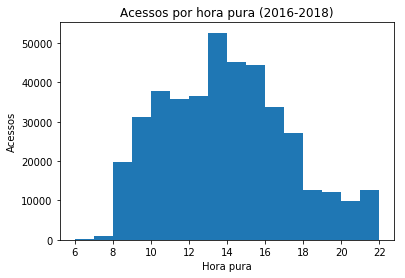

In [9]:
# Plotando a hora pura de todos os anos
plt.title("Acessos por hora pura (2016-2018)")
plt.xlabel("Hora pura")
plt.ylabel("Acessos")
x = [i for i in range(6,23)]
plt.hist(df["hora_pura"],bins = x)
plt.show()

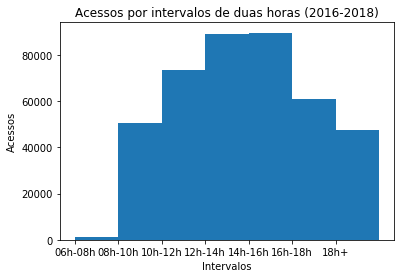

In [10]:
# Plotando o intervalo de horas de todos os anos
plt.title("Acessos por intervalos de duas horas (2016-2018)")
plt.xlabel("Intervalos")
plt.ylabel("Acessos")
x = [i for i in range(8)] 
plt.hist(df["intervalo"],bins = x)
plt.show()

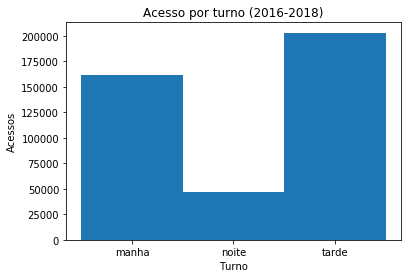

In [11]:
# Plotando o turno de todos os anos
plt.title("Acesso por turno (2016-2018)")
plt.xlabel("Turno")
plt.ylabel("Acessos")
x = [i for i in range(4)]
plt.hist(df["turno"], bins = x,align = "left")
plt.show()

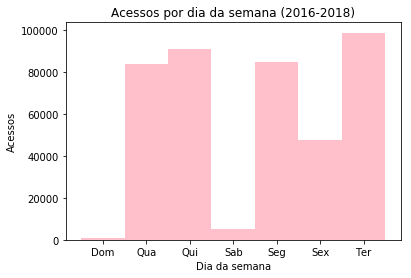

In [12]:
# Plotando os dias da semana de todos os anos

plt.title("Acessos por dia da semana (2016-2018)")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
x = [i for i in range(8)]
plt.hist(df["dia_da_semana"], bins = x, align = "left",color = "pink")
plt.show()

In [13]:
# Gerando o data frame do ano 2016
df2016 = df[df.ano == 2016]
df2016

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13
5,26/01/2016,15:31:20,lcc2-09,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9
6,26/01/2016,15:31:23,lcc2-10,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10
7,26/01/2016,15:31:25,lcc2-11,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,11
8,26/01/2016,15:31:28,lcc2-12,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,12
9,26/01/2016,15:41:36,lcc2-05,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,5


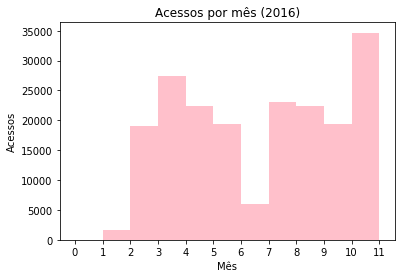

In [14]:
# Plotando acessos por mês (2016)

x = [i for i in range(12)]
plt.title("Acessos por mês (2016)")
plt.xlabel("Mês")
plt.ylabel("Acessos")
plt.hist(df2016["mes"], bins = x, color = "pink")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

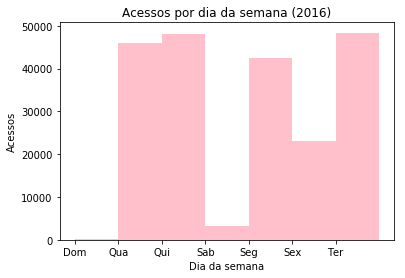

In [15]:
# Plotando acessos por dia da semana (2016)
x = [i for i in range(8)]
plt.title("Acessos por dia da semana (2016)")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df2016["dia_da_semana"], bins = x, color = "pink")
plt.show()

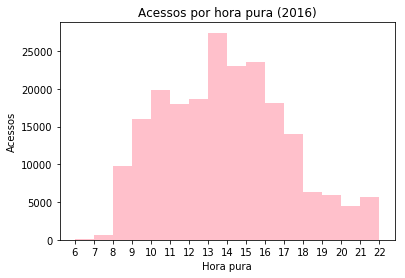

In [16]:
# Plotando acessos por hora pura (2016)
x = [i for i in range(6,23)]
plt.title("Acessos por hora pura (2016)")
plt.xlabel("Hora pura")
plt.ylabel("Acessos")
plt.hist(df2016["hora_pura"], bins = x, color = "pink")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

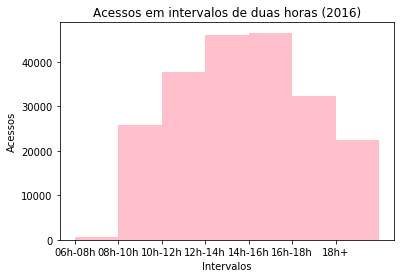

In [17]:
# Plotando acessos por intervalos de duas horas (2016)
x = [i for i in range(8)]
plt.title("Acessos em intervalos de duas horas (2016)")
plt.xlabel("Intervalos")
plt.ylabel("Acessos")
plt.hist(df2016["intervalo"], bins = x, color = "pink")
plt.show()

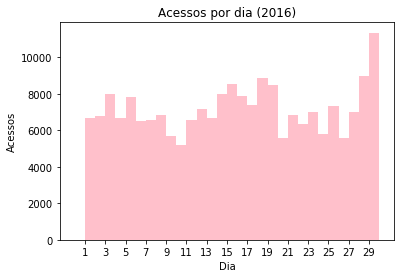

In [25]:
# Plotando acessos por dia (2016)
x = [i for i in range(31)]
plt.title("Acessos por dia (2016)")
plt.xlabel("Dia")
plt.ylabel("Acessos")
plt.hist(df2016["dia"],bins = x, color = "pink")
plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
plt.show()

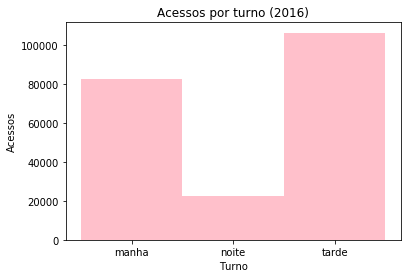

In [55]:
# Plotando acessos por turno (2016)
x = [i for i in range(4)]
plt.title("Acessos por turno (2016)")
plt.xlabel("Turno")
plt.ylabel("Acessos")
plt.hist(df2016["turno"], bins = x, color = "pink",align = "left")
plt.show()

In [21]:
# Gerando o data frame do ano 2017
df2017 = df[df.ano == 2017]
df2017

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
211469,30/01/2017,14:10:10,lcc2-34,-8535823525059948413,2017,1,30,Seg,14,tarde,14h-16h,34
211470,30/01/2017,14:10:16,lcc2-21,-85292856343897665,2017,1,30,Seg,14,tarde,14h-16h,21
211471,30/01/2017,14:10:31,lcc2-25,4010185481155475087,2017,1,30,Seg,14,tarde,14h-16h,25
211472,30/01/2017,14:10:34,lcc2-32,1027583428837321219,2017,1,30,Seg,14,tarde,14h-16h,32
211473,30/01/2017,14:10:40,lcc2-19,-2747962790275463847,2017,1,30,Seg,14,tarde,14h-16h,19
211474,30/01/2017,14:10:43,lcc2-26,616329888599911591,2017,1,30,Seg,14,tarde,14h-16h,26
211475,30/01/2017,14:10:55,lcc2-27,-8029875674051901993,2017,1,30,Seg,14,tarde,14h-16h,27
211476,30/01/2017,14:11:07,lcc2-28,710203151364569887,2017,1,30,Seg,14,tarde,14h-16h,28
211477,30/01/2017,14:11:10,lcc2-29,-8964805488632447931,2017,1,30,Seg,14,tarde,14h-16h,29
211478,30/01/2017,14:20:09,lcc2-34,-8535823525059948413,2017,1,30,Seg,14,tarde,14h-16h,34


In [22]:
# Gerando o dataframe de 2018
df2018 = df[df.ano == 2018]
df2018

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
400612,29/01/2018,08:30:08,lcc2-23,710888610848933747,2018,1,29,Seg,8,manha,08h-10h,23
400613,29/01/2018,08:30:11,lcc2-34,-8640866648899195157,2018,1,29,Seg,8,manha,08h-10h,34
400614,29/01/2018,08:30:32,lcc2-25,-5571270527041432347,2018,1,29,Seg,8,manha,08h-10h,25
400615,29/01/2018,08:30:47,lcc2-31,-1343902712107414181,2018,1,29,Seg,8,manha,08h-10h,31
400616,29/01/2018,08:31:26,lcc2-13,7086245898261506355,2018,1,29,Seg,8,manha,08h-10h,13
400617,29/01/2018,08:31:38,lcc2-12,-2252123563056576803,2018,1,29,Seg,8,manha,08h-10h,12
400618,29/01/2018,08:31:54,lcc2-02,3249914518771983251,2018,1,29,Seg,8,manha,08h-10h,2
400619,29/01/2018,08:40:07,lcc2-23,710888610848933747,2018,1,29,Seg,8,manha,08h-10h,23
400620,29/01/2018,08:40:10,lcc2-34,-8640866648899195157,2018,1,29,Seg,8,manha,08h-10h,34
400621,29/01/2018,08:40:31,lcc2-25,-5571270527041432347,2018,1,29,Seg,8,manha,08h-10h,25
